<a href="https://colab.research.google.com/github/Poojakamble24/Deep_Learning/blob/main/Multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
url1="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/mobile_train.csv"
df=pd.read_csv(url1)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
df['price_range'].unique()

array([1, 2, 3, 0])

In [ ]:
df1['price_range'].value_counts()

NameError: name 'df1' is not defined

Price range
1-0- Chep
2-1 -Moderate
3-2 -High
4-3 -Very expensive

### 4 classes to predict in above dataframe

### Seperate X and Y (price_range)

In [ ]:

X=df.drop(columns=['price_range'],axis=1)
Y=df[['price_range']]

In [ ]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [ ]:
Y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


### step 4: Perform preprocessing

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),('scalar',StandardScaler())]).set_output(transform='pandas')


In [ ]:
X_pre=num_pipe.fit_transform(X)
X_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


In [ ]:
### This is applicable to multiclass classification only,get onehotencoding for target feature



In [ ]:
pre=num_pipe.fit_transform(X)
pre

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1.010051,-1.253064,0.981177,-0.992890,0.957886,-1.656260,1.034357,-0.967737,0.646842,0.673534,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493,0.559641,0.994018,-1.014099
1996,1.653694,1.010051,1.321096,0.981177,-0.992890,-1.043966,0.383299,-1.046495,1.320993,-0.227564,-1.140810,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303,0.559641,0.994018,0.986097
1997,1.530773,-0.990050,-0.762748,0.981177,-0.762495,0.957886,0.217930,0.687548,-0.911225,1.521249,-1.140810,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394,0.559641,0.994018,-1.014099
1998,0.622527,-0.990050,-0.762748,-1.019184,-0.071307,0.957886,0.769162,-1.393304,0.134244,0.209639,-0.810929,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493,0.559641,0.994018,0.986097


### step 5: Apply train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_pre,Y,test_size=0.2,random_state=23)

In [ ]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1417,1.703773,1.010051,0.463042,-1.019184,-0.992890,-1.043966,0.989655,0.687548,-0.600410,1.521249,1.333295,0.709744,1.558662,-1.168519,-0.072765,-0.405712,-0.917331,0.559641,0.994018,-1.014099
1075,0.479120,-0.990050,-0.885327,0.981177,-0.301703,0.957886,-1.215274,-1.046495,0.105988,-1.539175,0.343653,1.967436,1.461461,-1.007148,-0.547577,-1.324131,-0.551204,0.559641,0.994018,0.986097
929,1.025434,1.010051,1.075937,0.981177,-0.992890,0.957886,-1.049904,1.381165,0.784130,-1.101971,-0.151168,-0.279731,-1.336559,-0.878052,-0.072765,1.201522,1.096367,0.559641,0.994018,0.986097
788,0.597488,-0.990050,-0.517590,-1.019184,1.771858,0.957886,-1.656260,-1.046495,1.320993,-1.539175,0.838474,-1.007749,-0.452486,0.334532,0.164641,1.431127,0.913303,0.559641,0.994018,0.986097
748,-1.002755,-0.990050,1.075937,-1.019184,0.159088,-1.043966,-1.546013,-1.046495,-1.250297,-0.664768,-0.151168,-0.268461,-1.408303,0.775304,0.639453,0.283103,0.547176,0.559641,0.994018,-1.014099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,0.326608,1.010051,-1.253064,-1.019184,0.619880,0.957886,-1.049904,-0.699686,1.660064,-1.101971,1.333295,-0.074623,-1.232414,-0.047224,0.876859,0.283103,-0.368140,0.559641,-1.006018,0.986097
1993,0.520094,1.010051,-1.253064,-1.019184,-0.992890,-1.043966,-0.774288,0.340740,-0.515642,0.209639,-1.635631,0.547461,-0.352970,1.694655,0.639453,1.201522,-1.100394,0.559641,0.994018,0.986097
1064,1.441997,-0.990050,-1.253064,0.981177,-0.301703,-1.043966,-0.829411,0.687548,-1.448088,0.646842,-0.645989,2.488093,1.192999,-1.291161,1.114266,-0.635317,-0.368140,0.559641,-1.006018,0.986097
742,1.328182,-0.990050,-0.395011,-1.019184,-0.992890,-1.043966,-1.325520,-1.046495,1.547040,0.646842,-1.635631,-1.066351,-0.790378,0.417523,-0.784983,-0.176107,-0.551204,0.559641,0.994018,-1.014099


In [ ]:
X_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1945,-0.527007,1.010051,1.688833,0.981177,0.159088,0.957886,-0.608919,1.034357,1.264481,1.521249,0.343653,-0.374396,-0.973210,-0.759099,-1.022389,0.053498,0.181050,0.559641,0.994018,-1.014099
912,-1.394279,-0.990050,-1.007906,0.981177,-0.532099,0.957886,-0.498672,-0.006069,1.320993,-1.101971,-0.151168,-1.251174,0.190896,1.229908,-1.259796,-0.176107,-0.002014,0.559641,-1.006018,0.986097
1069,0.399450,-0.990050,1.321096,-1.019184,-0.762495,-1.043966,-0.278179,0.340740,-0.091804,-0.227564,1.663176,0.358131,0.723191,-1.671073,-1.734608,-0.864922,-0.551204,-1.786861,-1.006018,0.986097
517,-0.408639,-0.990050,1.075937,-1.019184,0.850275,-1.043966,1.596010,-1.393304,-0.176571,-0.664768,1.333295,2.181559,1.537833,1.467814,0.639453,1.660732,-0.002014,0.559641,0.994018,-1.014099
1135,0.240108,-0.990050,-0.027274,-1.019184,-0.762495,-1.043966,-0.994781,-0.006069,1.405761,-1.539175,-1.140810,-0.509631,-1.609649,-0.046302,-1.022389,-1.094526,-1.100394,0.559641,0.994018,-1.014099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,0.112635,-0.990050,1.566254,0.981177,2.463046,-1.043966,0.989655,-1.393304,-0.543898,-1.101971,1.663176,1.198846,1.290200,0.926531,1.114266,0.053498,-1.649584,-1.786861,-1.006018,-1.014099
1860,0.927552,-0.990050,1.198517,-1.019184,-0.301703,0.957886,-0.388426,0.340740,1.688320,-1.101971,-0.810929,-0.978448,0.825021,-1.326201,-1.022389,0.053498,-0.002014,0.559641,0.994018,-1.014099
1872,1.152907,-0.990050,1.688833,-1.019184,-0.992890,0.957886,-1.601136,1.381165,-0.995993,-0.664768,-1.635631,-0.493854,0.873622,-0.752644,-1.734608,-1.324131,-1.649584,0.559641,0.994018,-1.014099
789,0.854711,-0.990050,0.463042,-1.019184,0.850275,0.957886,1.265271,-0.699686,1.349249,-0.664768,1.168355,0.484351,0.181639,1.650393,1.114266,1.660732,0.364113,0.559641,-1.006018,-1.014099


In [ ]:
Y_train

,price_range
1417,1
1075,1
929,0
788,2
748,2
...,...
950,1
1993,3
1064,1
742,2


In [ ]:
Y_test

,price_range
1945,0
912,2
1069,0
517,3
1135,1
...,...
568,3
1860,0
1872,1
789,3


**### This is applicable to multiclass classification only,get onehot encoding for target feature**

In [21]:
from keras.utils import to_categorical
Y_train_cat = to_categorical(Y_train)
Y_test_cat = to_categorical(Y_test)

In [22]:
Y_train_cat[0:5]

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [23]:
Y_test_cat[0:5]

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], dtype=float32)

In [24]:
Y_train_cat.shape[1]

4

In [25]:
Y_train_cat.shape[1]

4

In [31]:
from keras.models import Sequential
from keras.layers import Input, Dense,Dropout
from  keras.callbacks import EarlyStopping

In [32]:
from ast import mod
# Initialize model
model = Sequential()

# Create a input layer
model.add(Input(shape=(X_train.shape[1],)))

# Create a Dense layer 1
model.add(Dense(64, activation='relu'))

# Add Dropout layer
model.add(Dropout(0.2))

# Create a Dense layer 2
model.add(Dense(32, activation='relu'))

# Add Dropout layer
model.add(Dropout(0.1))

# output layer
model.add(Dense(Y_train_cat.shape[1], activation='softmax'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 3556 (13.89 KB)
Trainable params: 3556 (13.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
# Add early stoping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1)

In [37]:
hist=model.fit(X_train, Y_train_cat, epochs=200, validation_data=(X_test, Y_test_cat), callbacks=[early_stop])

Epoch 1/200
50/50 [==============================] - 2s 8ms/step - loss: 1.3946 - accuracy: 0.3025 - val_loss: 1.2856 - val_accuracy: 0.4200
Epoch 2/200
50/50 [==============================] - 0s 3ms/step - loss: 1.2126 - accuracy: 0.4450 - val_loss: 1.0983 - val_accuracy: 0.5400
Epoch 3/200
50/50 [==============================] - 0s 3ms/step - loss: 1.0113 - accuracy: 0.5750 - val_loss: 0.8721 - val_accuracy: 0.6550
Epoch 4/200
50/50 [==============================] - 0s 3ms/step - loss: 0.8280 - accuracy: 0.6463 - val_loss: 0.6883 - val_accuracy: 0.7800
Epoch 5/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6828 - accuracy: 0.7212 - val_loss: 0.5591 - val_accuracy: 0.8225
Epoch 6/200
50/50 [==============================] - 0s 8ms/step - loss: 0.5806 - accuracy: 0.7650 - val_loss: 0.4717 - val_accuracy: 0.8550
Epoch 7/200
50/50 [==============================] - 0s 6ms/step - loss: 0.4961 - accuracy: 0.8188 - val_loss: 0.4056 - val_accuracy: 0.8650
Epoch 8/200
5

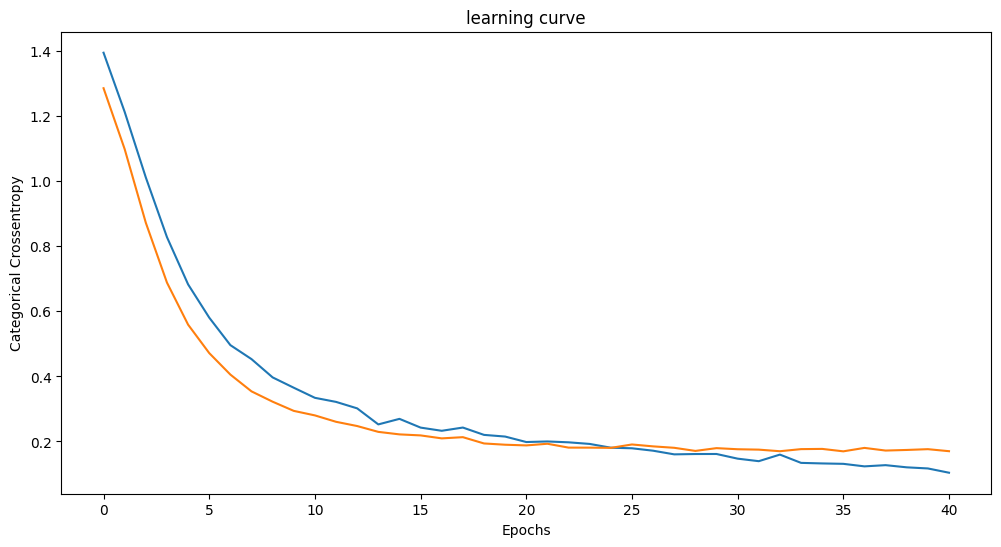

In [38]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'],label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.title('learning curve')
plt.show()

In [39]:
model.evaluate(X_train,Y_train_cat)

50/50 [==============================] - 0s 2ms/step - loss: 0.0413 - accuracy: 0.9944


[0.041337355971336365, 0.9943749904632568]

In [40]:
model.evaluate(X_test,Y_test_cat)

13/13 [==============================] - 0s 2ms/step - loss: 0.1702 - accuracy: 0.9350


[0.17018923163414001, 0.9350000023841858]

**### Predict the result for train and test**

In [41]:
Yprob_train=model.predict(X_train)
Yprob_test=model.predict(X_test)

13/13 [==============================] - 0s 2ms/step


In [42]:
Yprob_test[0:5]

array([[9.9087453e-01, 9.1253612e-03, 5.7881519e-11, 3.1262406e-22],
       [4.0673904e-15, 2.1145056e-04, 9.8444939e-01, 1.5339232e-02],
       [9.9777001e-01, 2.2299041e-03, 9.5937234e-12, 1.1880045e-22],
       [8.8150848e-36, 1.5980795e-16, 3.0764444e-05, 9.9996918e-01],
       [6.3009014e-05, 9.8940104e-01, 1.0535896e-02, 2.4893028e-09]],
      dtype=float32)

In [43]:
Yprob_train[0:5]

array([[1.9312565e-03, 9.9699873e-01, 1.0700331e-03, 1.1208945e-10],
       [1.1414024e-04, 9.9970090e-01, 1.8497907e-04, 3.8464745e-11],
       [9.7061783e-01, 2.9382184e-02, 7.5332229e-10, 1.4718318e-19],
       [2.2931974e-09, 1.8937213e-02, 9.8091769e-01, 1.4515533e-04],
       [6.0283867e-10, 1.3796282e-02, 9.8486882e-01, 1.3349243e-03]],
      dtype=float32)

In [44]:
import numpy as np
Y_pred_train=np.argmax(Yprob_train,axis=1)
Y_pred_test=np.argmax(Yprob_test,axis=1)

In [45]:
Y_pred_train[0:5]

array([1, 1, 0, 2, 2])

In [46]:
Y_pred_test[0:5]

array([0, 2, 0, 3, 1])

In [47]:
Y_train.head()

,price_range
1417,1
1075,1
929,0
788,2
748,2


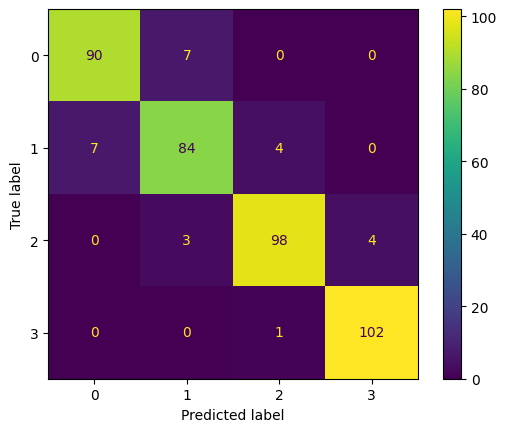

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred_test)


In [55]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        97
           1       0.89      0.88      0.89        95
           2       0.95      0.93      0.94       105
           3       0.96      0.99      0.98       103

    accuracy                           0.94       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.94      0.93       400



In [ ]:
### Because F1- macro is more than 0.8 hense model is a good model

**### Because F1- macro is more than 0.8 hense model is a good model**

Out **of** sample prediction

In [61]:
url2="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/mobile_test.csv"
Xnew =pd.read_csv(url2)
Xnew.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [62]:
Xnew2 = Xnew.drop(columns=['id'])
Xnew2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [63]:
Xnew2_pre=num_pipe.transform(Xnew2)
Xnew2_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.445060,1.010051,0.340463,0.981177,2.232650,-1.043966,-1.490890,-1.393304,1.490528,-0.664768,1.003414,-0.944639,0.371413,1.246506,-0.072765,0.283103,-1.649584,-1.786861,0.994018,-1.014099
1,-0.904874,1.010051,-1.253064,0.981177,-0.071307,0.957886,1.596010,1.034357,1.434017,0.209639,0.343653,0.227403,-0.913037,1.632873,-1.497202,-1.324131,-0.734267,0.559641,-1.006018,-1.014099
2,1.294038,1.010051,1.566254,-1.019184,-0.762495,-1.043966,-0.278179,1.381165,1.292737,-0.664768,-0.975869,1.408462,0.264954,0.250619,1.114266,0.971917,-0.185077,-1.786861,0.994018,0.986097
3,0.699922,-0.990050,-1.253064,0.981177,3.154233,0.957886,-0.388426,-0.006069,-1.250297,1.521249,1.663176,-0.789118,1.158284,1.631029,-0.547577,-1.324131,-0.734267,0.559641,0.994018,-1.014099
4,0.444976,-0.990050,-0.149853,-1.019184,1.541463,0.957886,0.934531,-0.006069,-0.911225,0.646842,1.333295,0.234165,-1.021810,-0.323860,0.639453,0.512708,-0.734267,0.559641,-1.006018,0.986097


In [64]:
probs = model.predict(Xnew2_pre)

32/32 [==============================] - 0s 3ms/step


In [65]:
probs[0:5]

array([[1.0990029e-20, 4.3941984e-08, 5.4359809e-02, 9.4564009e-01],
       [1.6739320e-28, 1.2794395e-10, 1.5180961e-02, 9.8481899e-01],
       [3.0580298e-17, 2.1609729e-05, 9.5402902e-01, 4.5949433e-02],
       [3.3790460e-35, 5.7385640e-16, 3.6284247e-05, 9.9996370e-01],
       [1.6780733e-03, 9.9579561e-01, 2.5263666e-03, 3.2475520e-09]],
      dtype=float32)

In [66]:
preds = np.argmax(probs, axis=1)
preds[0:5]

array([3, 3, 2, 3, 1])

In [67]:
max_probs = np.max(probs, axis=1)
max_probs[0:5]

array([0.9456401, 0.984819 , 0.954029 , 0.9999637, 0.9957956],
      dtype=float32)

In [68]:
df_final = Xnew[['id']]
df_final['price_range_pred'] = preds
df_final['prob'] = max_probs
df_final

<ipython-input-68-76be8f7fcc7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['price_range_pred'] = preds
<ipython-input-68-76be8f7fcc7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['prob'] = max_probs


,id,price_range_pred,prob
0,1,3,0.945640
1,2,3,0.984819
2,3,2,0.954029
3,4,3,0.999964
4,5,1,0.995796
...,...,...,...
995,996,2,0.948198
996,997,1,0.999717
997,998,0,0.669613
998,999,2,0.922965


In [69]:
df_final['price_range_pred'].value_counts()

price_range_pred
3    269
2    249
0    249
1    233
Name: count, dtype: int64

<Axes: xlabel='price_range_pred'>

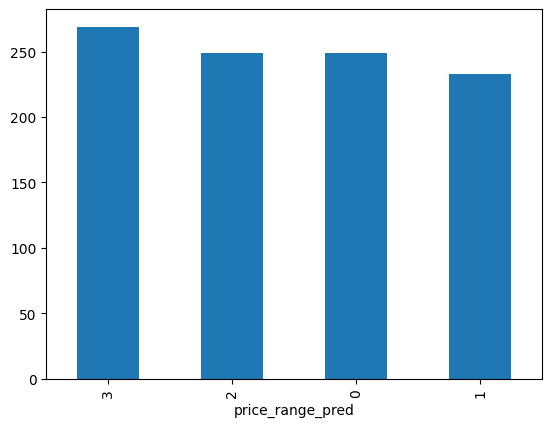

In [71]:
df_final['price_range_pred'].value_counts().plot(kind='bar')

In [75]:
df_final.to_csv('ResultMobile.csv', index=False)